In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# points
x = [0.0, 1.0, 1.3, 2.5, 3.0, 3.3, 4.5, 5.6, 6.0, 7.3, 7.8, 8.1, 8.9, 10.0, 11.0,
     12.1, 12.9, 13.5, 14.2, 15.0, 15.8, 16.5, 17.1, 18.0, 19.5, 20.0]
# measured values
v = [0.1, 1.2, 1.5, 3.8, 3.7, 4.5, 4.7, 5.2, 4.5, 4.3, 2.8, 3.1, 1.5, 0.8, -2.1,
     -2.1, -3.5, -4.5, -4.5, -5.3, -4.1, -4.5, -3.1, -3.7, -1.5, -0.1]

In [3]:
def f1(A, w):
    res = 0
    for i in range(26):
        sinwx = math.sin(w*x[i])
        res += sinwx * (A * sinwx - v[i])
    
    res *= 2
    return res

In [4]:
def f2(A, w):
    res = 0
    for i in range(26):
        res += A*math.cos(w*x[i]) * x[i] * (A*math.sin(w*x[i]) - v[i])
    
    res *= 2
    return res

In [5]:
def f1_wrt_A(A, w):
    res = 0
    for i in range(26):
        res += math.sin(w*x[i])**2
    
    res *= 2
    return res

In [6]:
def f1_wrt_w(A, w):
    res = 0
    for i in range(26):
        sinwx = math.sin(w*x[i])
        coswx = math.cos(w*x[i])
        res += (A*sinwx - v[i]) * coswx * x[i] + sinwx * A * coswx*x[i]
    
    res *= 2
    return res

In [7]:
def f2_wrt_A(A, w):
    return f1_wrt_w(A, w)

In [8]:
def f2_wrt_w(A, w):
    res = 0
    for i in range(26):
        sinwx = math.sin(w*x[i])
        coswx = math.cos(w*x[i])
        res += A*A*x[i]*x[i]*coswx**2 - A*sinwx*x[i]**2 * (A*sinwx - v[i])
        
    res *= 2
    return res

In [9]:
def inv_2x2(M):
    det = M[0][0] * M[1][1] - M[0][1] * M[1][0]
    res = [[M[1][1] / det, -M[0][1] / det], [-M[1][0] / det, M[0][0] / det]]
    
    return res

In [10]:
A = max(max(v), abs(min(v)))
w = 0.25

eps = 1e-8

In [11]:
converged = False

while not converged:
    J = [[f1_wrt_A(A, w), f1_wrt_w(A, w)], [f2_wrt_A(A, w), f2_wrt_w(A, w)]]
    J_inv = inv_2x2(J)
    f1Aw = -f1(A, w)
    f2Aw = -f2(A, w)
    
    dA = J_inv[0][0] * f1Aw + J_inv[0][1] * f2Aw
    dw = J_inv[1][0] * f1Aw + J_inv[1][1] * f2Aw
    
    A += dA
    w += dw
    
    print(A, w)
    
    if abs(dA) < eps and abs(dw) < eps:
        converged = True

5.420047255230958 0.35309275647522087
5.93351645278975 0.30083804191865193
4.874362247853318 0.3087674378596996
4.846052972591454 0.3099317888686435
4.845537066324397 0.3099294631799258
4.845537066830033 0.3099294630209298


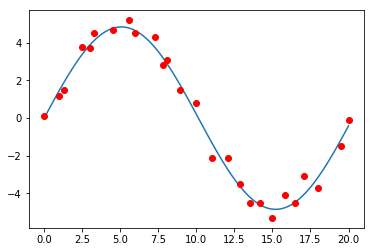

In [15]:
%matplotlib inline
xs = np.linspace(min(x), max(x), num=100)
ys = np.array([A*math.sin(w*x) for x in xs])
plt.plot(xs, ys)
plt.plot(x, v, "ro")
plt.show()